## Ключевые вопросы HR-агентства:

- Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?
- Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?
- Как соотносятся зарплаты Data Scientist в различных компаниях?
- Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

In [214]:
import pandas as pd

from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms

import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('ds_salaries.zip')
data

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


### Посмотрим на основные параметры датасета, уберем дубликаты, ненужные колонки.

In [215]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [216]:
data.drop(columns=['salary', 'salary_currency', 'Unnamed: 0'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary_in_usd       607 non-null    int64 
 5   employee_residence  607 non-null    object
 6   remote_ratio        607 non-null    int64 
 7   company_location    607 non-null    object
 8   company_size        607 non-null    object
dtypes: int64(3), object(6)
memory usage: 42.8+ KB


In [217]:
print('Количество дубликатов: {}'.format(data[data.duplicated()].shape[0]))

Количество дубликатов: 42


In [218]:
data.drop_duplicates(inplace=True)

In [219]:
data['job_title'].value_counts()

job_title
Data Scientist                              130
Data Engineer                               121
Data Analyst                                 82
Machine Learning Engineer                    39
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                  

In [220]:
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 565 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           565 non-null    int64   
 1   experience_level    565 non-null    category
 2   employment_type     565 non-null    category
 3   job_title           565 non-null    category
 4   salary_in_usd       565 non-null    int64   
 5   employee_residence  565 non-null    category
 6   remote_ratio        565 non-null    int64   
 7   company_location    565 non-null    category
 8   company_size        565 non-null    category
dtypes: category(6), int64(3)
memory usage: 28.9 KB


### Выберем нужные нам данные из датасета, сделаем 3 выборки: общую, Data Science и Data Engineer.

In [221]:
jobs_ds = ['Data Scientist', 'Director of Data Science', 'Applied Data Scientist', 'Head of Data Science', 'Data Science Consultant', 'Principal Data Scientist', 'Data Science Manager']
jobs_de = ['Data Engineer', 'Big Data Engineer', 'Lead Data Engineer']
data_science = data[data['job_title'].apply(lambda x: x in jobs_ds)]
data_engineer = data[data['job_title'].apply(lambda x: x in jobs_de)]
dataDSDE = data[data['job_title'].apply(lambda x: (x in jobs_ds) or (x in jobs_de))]
dataDSDE.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307 entries, 0 to 603
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           307 non-null    int64   
 1   experience_level    307 non-null    category
 2   employment_type     307 non-null    category
 3   job_title           307 non-null    category
 4   salary_in_usd       307 non-null    int64   
 5   employee_residence  307 non-null    category
 6   remote_ratio        307 non-null    int64   
 7   company_location    307 non-null    category
 8   company_size        307 non-null    category
dtypes: category(6), int64(3)
memory usage: 19.3 KB


## Посмотрим на распределение общей выборки (DS+DE)

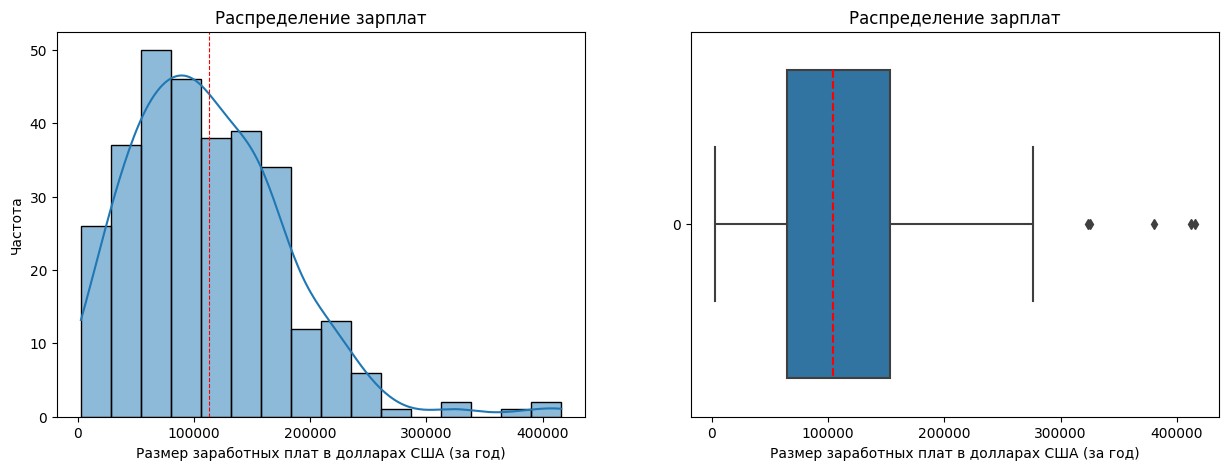

In [222]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(dataDSDE['salary_in_usd'], kde=True, ax=axes[0])
axes[0].set(xlabel='Размер заработных плат в долларах США (за год)', ylabel='Частота')
axes[0].set_title('Распределение зарплат')
axes[0].axvline(dataDSDE['salary_in_usd'].mean(), color='red', linestyle='--', linewidth=0.8)

sns.boxplot(dataDSDE['salary_in_usd'], ax=axes[1], orient='h', medianprops={"color": "red", "linestyle": '--'})
axes[1].set(xlabel='Размер заработных плат в долларах США (за год)')
axes[1].set_title('Распределение зарплат')

plt.show()

#### Распределение не является нормальным.

<AxesSubplot: xlabel='experience_level'>

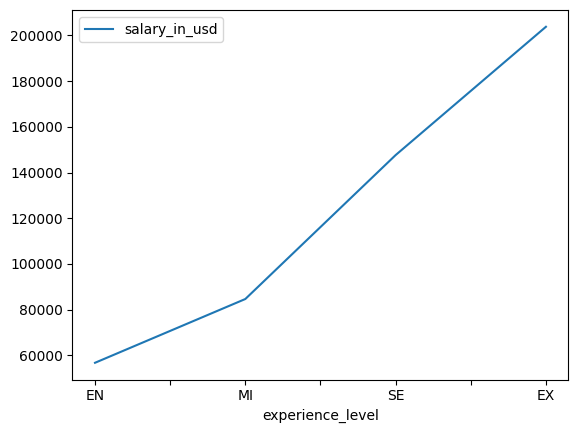

In [223]:
plot_data = dataDSDE[['salary_in_usd', 'experience_level']].groupby('experience_level').agg('mean').sort_values(by='salary_in_usd')
plot_data.plot()

##### Наблюдается близкий к линейному график роста средней зарплаты в зависимости от опыта

<AxesSubplot: xlabel='employment_type'>

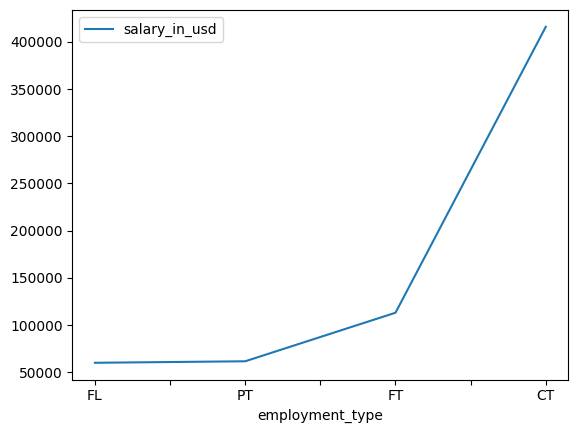

In [224]:
plot_data = dataDSDE[['salary_in_usd', 'employment_type']].groupby('employment_type').agg('mean').sort_values(by='salary_in_usd')
plot_data.plot()

##### Самые высокооплачиваемые специалисты в основном работают по контракту

<AxesSubplot: title={'center': 'Средняя годовая зарплата специалистов DS и DE'}, xlabel='work_year'>

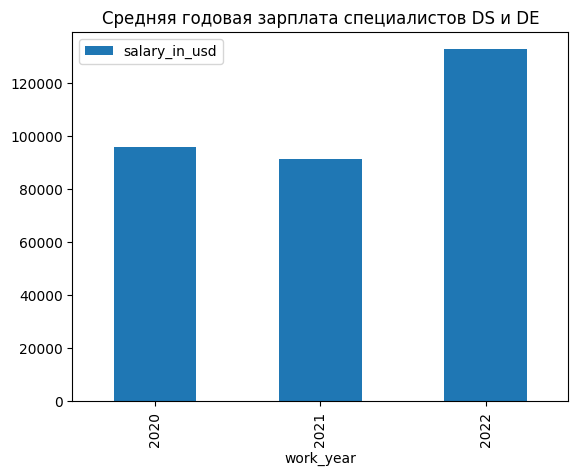

In [225]:
plot_data = dataDSDE[['salary_in_usd', 'work_year']].groupby('work_year').agg('mean').sort_values(by='work_year')
plot_data.plot(kind='bar', title='Средняя годовая зарплата специалистов DS и DE')

C:\Users\dennn\AppData\Local\Temp\ipykernel_12796\2192428920.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_data = dataDSDE[data['experience_level'] == 'EN'][['salary_in_usd', 'work_year']].groupby('work_year').agg('mean').sort_values(by='work_year')


<AxesSubplot: title={'center': 'Средняя годовая зарплата Junior специалистов DS и DE'}, xlabel='work_year'>

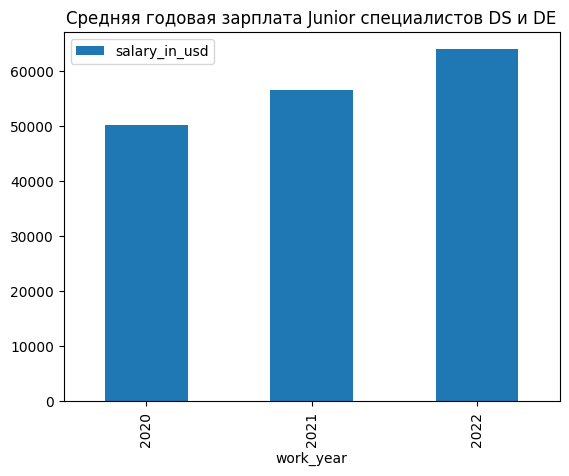

In [226]:
plot_data = dataDSDE[data['experience_level'] == 'EN'][['salary_in_usd', 'work_year']].groupby('work_year').agg('mean').sort_values(by='work_year')
plot_data.plot(kind='bar', title='Средняя годовая зарплата Junior специалистов DS и DE')

<AxesSubplot: title={'center': 'Средняя годовая зарплата Middle специалистов DS и DE'}, xlabel='work_year'>

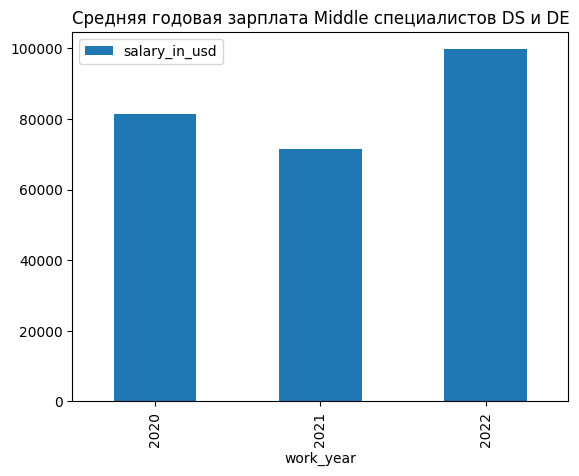

In [227]:
plot_data = dataDSDE[dataDSDE['experience_level'] == 'MI'][['salary_in_usd', 'work_year']].groupby('work_year').agg('mean').sort_values(by='work_year')
plot_data.plot(kind='bar', title='Средняя годовая зарплата Middle специалистов DS и DE')

C:\Users\dennn\AppData\Local\Temp\ipykernel_12796\283014639.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_data = dataDSDE[data['experience_level'] == 'SE'][['salary_in_usd', 'work_year']].groupby('work_year').agg('mean').sort_values(by='work_year')


<AxesSubplot: title={'center': 'Средняя годовая зарплата Senior специалистов DS и DE'}, xlabel='work_year'>

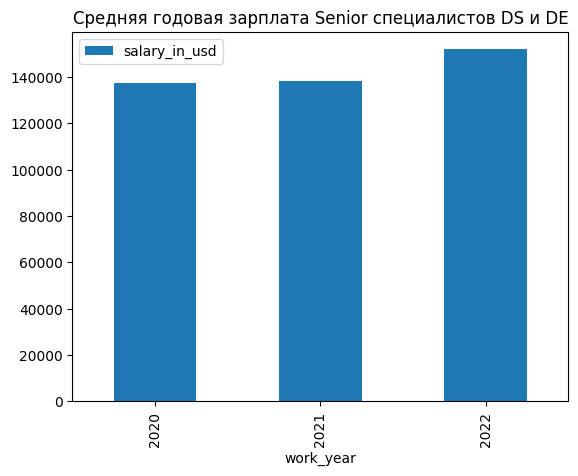

In [228]:
plot_data = dataDSDE[data['experience_level'] == 'SE'][['salary_in_usd', 'work_year']].groupby('work_year').agg('mean').sort_values(by='work_year')
plot_data.plot(kind='bar', title='Средняя годовая зарплата Senior специалистов DS и DE')

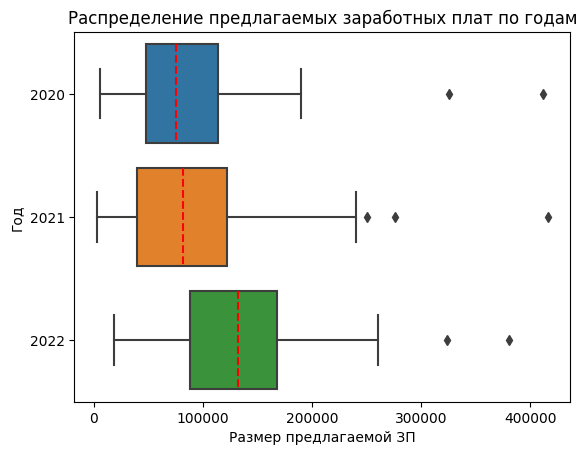

In [231]:
ax = sns.boxplot(dataDSDE, x='salary_in_usd', y='work_year', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер предлагаемой ЗП', ylabel='Год', title='Распределение предлагаемых заработных плат по годам')
plt.show()

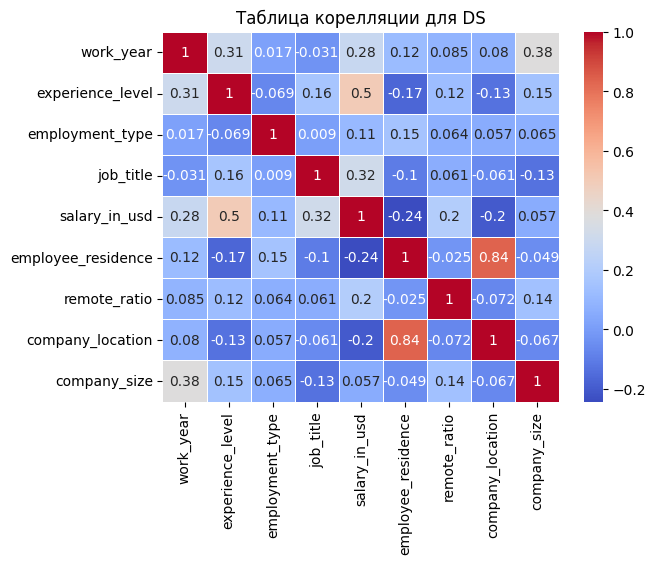

In [ ]:
import category_encoders as ce

ord_encoder = ce.OrdinalEncoder()
encoded_data = pd.DataFrame(ord_encoder.fit_transform(data_science))
#encoded_data['work_year'] = encoded_data['work_year'] - 2020

ax = sns.heatmap(encoded_data.corr(), annot=True, linewidth=.5, cmap="coolwarm")
plt.title('Таблица корелляции для DS')
plt.show()

#### Наблюдается положительная корреляция года и уровня зарплаты DS

### Проверим, выросли ли зарплаты DS между 2020 и 2021 годами.
##### Нулевая гипотеза будет звучать как: Зарплаты DS в 2020 году не превышают зарплаты за 2021 год. Альтернатиавная: Зарплаты DS в 2021 году больше зарплат в 2020 году.

In [ ]:
alpha = 0.05 # Оставим это значение для всех тестов

ds_2020 = data_science[data_science['work_year'] == 2020]['salary_in_usd']
ds_2021 = data_science[data_science['work_year'] == 2021]['salary_in_usd']

_, p = stats.mannwhitneyu(ds_2020, ds_2021, alternative='greater')

print('p-value = {:.3f}'.format(p))

if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.703
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


### Теперь проверим, выросли ли зарплаты DS между 2021 и 2022 годами.
##### Нулевая гипотеза будет звучать как: Зарплаты DS в 2021 году не превышают зарплаты за 2022 год. Альтернатиавная: Зарплаты DS в 2022 году больше зарплат в 2021 году.

In [ ]:
ds_2022 = data_science[data_science['work_year'] == 2022]['salary_in_usd']

_, p = stats.mannwhitneyu(ds_2021, ds_2022, alternative='greater')

print('p-value = {:.3f}'.format(p))

if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 1.000
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


##### Нет оснований утверждать, что ЗП специалистов DataScience растет каждый год.

### Теперь проверим соотношение зарплат DS и DE за 2022 год.

<function matplotlib.pyplot.show(close=None, block=None)>

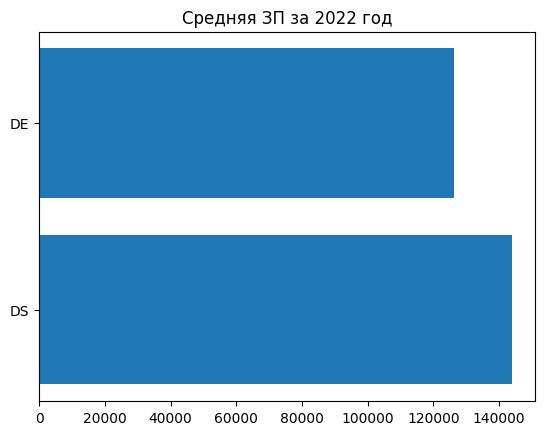

In [ ]:
de_2022 = data_engineer[data_engineer['work_year'] == 2022]['salary_in_usd']

_, ax = plt.subplots()
ax.barh(['DS','DE'], [ds_2022.mean(), de_2022.mean()])
ax.set_title('Средняя ЗП за 2022 год')
plt.show

##### Нулевая гипотеза будет звучать как: Зарплаты DS и DE в 2022 году равны. Альтернатиавная: Зарплаты DS и DE в 2022 году не равны.

In [ ]:
_, p = stats.mannwhitneyu(ds_2022, de_2022)

print('p-value = {:.3f}'.format(p))

if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.023
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


##### Теперь нулевая гипотеза будет звучать как: Зарплаты DS меньше или равны DE в 2022 году. Альтернатиавная: Зарплаты DS выше DE в 2022 году.

In [ ]:
_, p = stats.mannwhitneyu(ds_2022, de_2022, alternative='greater')

print('p-value = {:.3f}'.format(p))

if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.012
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


##### Зарплаты специалистов DataScience выше зарплат специалистов DataEngineer в 2022 году.

### Посмотрим как соотносятся зарплаты DS в компаниях различных размеров.

<function matplotlib.pyplot.show(close=None, block=None)>

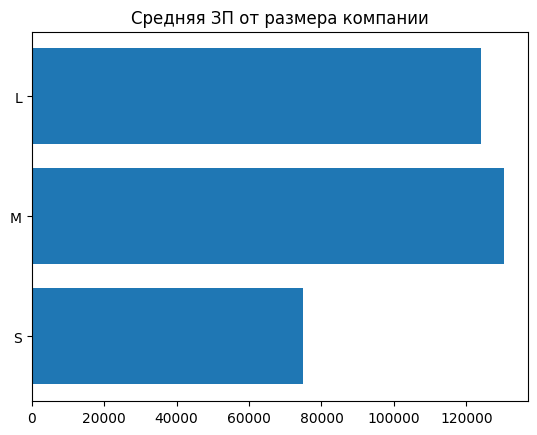

In [ ]:
data_scienceS = data_science[data_science['company_size'] == 'S']['salary_in_usd']
data_scienceM = data_science[data_science['company_size'] == 'M']['salary_in_usd']
data_scienceL = data_science[data_science['company_size'] == 'L']['salary_in_usd']

_, ax = plt.subplots()
ax.barh(['S','M','L'], [data_scienceS.mean(), data_scienceM.mean(), data_scienceL.mean()])
ax.set_title('Средняя ЗП от размера компании')
plt.show

#### Проверим, статистически значимы ли эти различия:
##### Сформулируем нулевую гипотезу: Зарплаты специалистов DS в компаниях разных размеров не отличаются.

In [ ]:
_, p = stats.kruskal(data_scienceS, data_scienceM, data_scienceL)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))


p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


##### Уровни зарплат различны в компаниях разных размеров.

### Проверим значимость отличий между большими и маленькими компаниями: 
##### Нулевая гипотеза: В больших и маленьких компаниях уровни зарплат не отличаются. Альтернативная: В больших компаниях зарплаты выше чем в маленьких.

In [ ]:
_, p = stats.mannwhitneyu(data_scienceL, data_scienceS, alternative='greater')

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


##### В крупных компаниях зарплаты DS выше чем в маленьких.

### Проверим различия в ЗП больших и средних компаний.
##### Нулевая гипотеза: ЗП в сфере DS больших и средних компаний не отличается.

In [ ]:
_, p = stats.mannwhitneyu(data_scienceM, data_scienceL)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.161
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


##### Нет оснований полагать, что уровень ЗП специалистов DataScience в средних и крупных компаниях различается.

### Проверим есть ли связь между размером компании и наличием вакансии DS или DE.

In [ ]:
data['DSDE'] = data['job_title'].apply(lambda x: (x in jobs_ds) or (x in jobs_de))
table = pd.crosstab(data['company_size'], data['DSDE'])
table

DSDE,False,True
company_size,,
L,89,109
M,143,183
S,44,39


##### Сформулируем нулевую гипотезу: Между размером компании и наличием вакансии DS или DE нет взаимосвязи.

In [ ]:
_, p, _, _ = stats.chi2_contingency(table)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.322
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


##### Нет оснований полагать, что есть взаимосвязь между размером компании и наличием вакансии DS или DE

## Подведем итог
#### В результате анализа датасета получены следующие ответы на поставленные вопросы:
- Нет оснований полагать, что есть ежегодный рост зарплат у специалистов Data Scientist.
- Зарплаты специалистов Data Scientist выше, чем специалистов Data Engineer в 2022 году.
- Зарплаты специалистов Data Scientist в больших и средних компаниях выше, чем в маленьких, но между большими и средними компаниями статистически значимых различий зарплат не выявлено.
- Нет оснований полагать, что есть взаимосвязь между размером компании и наличием вакансии Data Scientist или Data Engineer.